<a href="https://colab.research.google.com/github/Kitzuken/Menstrual-Tracker/blob/main/mentrual_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

file_path = "/content/FedCycleData071012 (2).csv"  # Sesuaikan dengan nama file yang di-upload
df = pd.read_csv(file_path)
df.head()  # Tampilkan 5 baris pertama


,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


Mean Absolute Error: 1.95 hari
Masukkan tanggal lahir Anda (YYYY-MM-DD): 2007-12-04
Masukkan tanggal terakhir menstruasi Anda (YYYY-MM-DD): 2025-02-20
Masukkan perkiraan hari ovulasi dalam siklus Anda: 2
Masukkan lama menstruasi (hari): 3
Masukkan jumlah hari dengan kesuburan tinggi: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


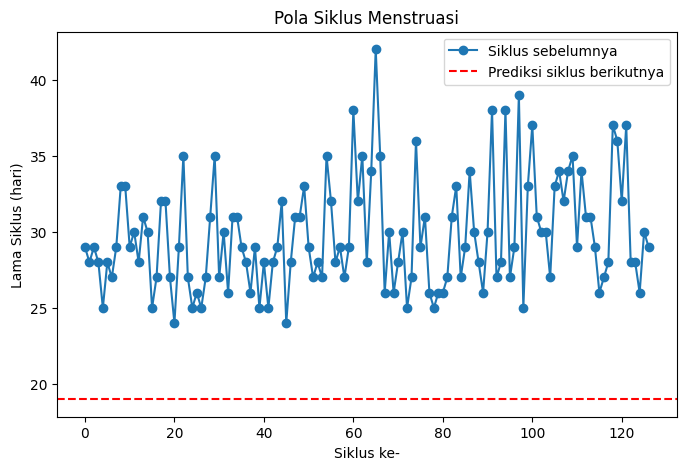

Perkiraan lama siklus berikutnya: 19 hari
Tanggal menstruasi berikutnya: 2025-03-11


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from datetime import datetime, timedelta

# Load dataset
# Updated file path to a relative path assuming the file is in the same directory
file_path = "FedCycleData071012 (2).csv"
df_cycle = pd.read_csv(file_path)

# Pilih kolom yang relevan dan ubah ke numerik
relevant_columns = ['LengthofCycle', 'Age', 'EstimatedDayofOvulation', 'LengthofMenses', 'TotalNumberofHighDays']
df_cleaned = df_cycle[relevant_columns].apply(pd.to_numeric, errors='coerce').dropna()

# Pisahkan fitur (X) dan target (y)
X = df_cleaned[['Age', 'EstimatedDayofOvulation', 'LengthofMenses', 'TotalNumberofHighDays']]
y = df_cleaned['LengthofCycle']

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} hari")

# Input manual dari pengguna
birth_date = input("Masukkan tanggal lahir Anda (YYYY-MM-DD): ")
last_period_input = input("Masukkan tanggal terakhir menstruasi Anda (YYYY-MM-DD): ")

try:
    birth_date = datetime.strptime(birth_date, "%Y-%m-%d")
    last_period_date = datetime.strptime(last_period_input, "%Y-%m-%d")
except ValueError:
    print("Format tanggal salah. Pastikan menggunakan format YYYY-MM-DD.")
    exit()

current_date = datetime.today()
age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
estimated_ovulation = int(input("Masukkan perkiraan hari ovulasi dalam siklus Anda: "))
length_of_menses = int(input("Masukkan lama menstruasi (hari): "))
high_fertility_days = int(input("Masukkan jumlah hari dengan kesuburan tinggi: "))

# Prediksi lama siklus berikutnya
data_input = np.array([[age, estimated_ovulation, length_of_menses, high_fertility_days]])
predicted_cycle_length = int(model.predict(data_input)[0])

# Menentukan tanggal menstruasi berikutnya
next_period_date = last_period_date + timedelta(days=predicted_cycle_length)

# Visualisasi pola siklus sebelumnya
plt.figure(figsize=(8, 5))
plt.plot(range(len(df_cleaned['LengthofCycle'])), df_cleaned['LengthofCycle'], marker='o', linestyle='-', label='Siklus sebelumnya')
plt.axhline(y=predicted_cycle_length, color='r', linestyle='--', label='Prediksi siklus berikutnya')
plt.xlabel('Siklus ke-')
plt.ylabel('Lama Siklus (hari)')
plt.title('Pola Siklus Menstruasi')
plt.legend()
plt.show()

# Output hasil
print(f"Perkiraan lama siklus berikutnya: {predicted_cycle_length} hari")
print(f"Tanggal menstruasi berikutnya: {next_period_date.strftime('%Y-%m-%d')}")
